# Cars Brand Assign - Decision Tree Model
This project involves classification of cars based on their brand, using a decision tree model. The focus is on exploring a set of characteristics of the vehicles available in the dataset, in order to create a model able to correctly assign the brand of each car.

In [5]:
import pandas as pd

In [6]:
# !pip install imblearn
from imblearn.under_sampling import RandomUnderSampler, TomekLinks

## Data Loading

In [7]:
data_cars = pd.read_csv('./dataset/cars_efficient.csv', sep=',')

In [8]:
data_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           261 non-null    float64
 1   cylinders     261 non-null    int64  
 2   cubicinches   259 non-null    float64
 3   hp            261 non-null    int64  
 4   weightlbs     258 non-null    float64
 5   time-to-60    261 non-null    int64  
 6   year          261 non-null    int64  
 7   brand         261 non-null    object 
 8   is_efficient  261 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 18.5+ KB


## Data processing and analysis

In [9]:
data_cars.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand,is_efficient
0,14.0,8,350.0,165,4209.0,12,1972,US.,0
1,31.9,4,89.0,71,1925.0,14,1980,Europe.,1
2,17.0,8,302.0,140,3449.0,11,1971,US.,0
3,15.0,8,400.0,150,3761.0,10,1971,US.,0
4,30.5,4,98.0,63,2051.0,17,1978,US.,1


In [10]:
round(data_cars.describe(), 2)

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,is_efficient
count,261.00,261.00,259.00,261.00,258.00,261.00,261.00,261.00
mean,23.14,5.59,200.92,106.36,3009.83,15.55,1976.82,0.38
std,7.82,1.73,109.26,40.50,854.04,2.91,3.64,0.49
min,10.00,3.00,68.00,46.00,1613.00,8.00,1971.00,0.00
25%,16.90,4.00,99.50,75.00,2248.00,14.00,1974.00,0.00
50%,22.00,6.00,156.00,95.00,2867.50,16.00,1977.00,0.00
75%,28.80,8.00,303.00,138.00,3670.00,17.00,1980.00,1.00
max,46.60,8.00,455.00,230.00,4997.00,25.00,1983.00,1.00


In [11]:
# Checking null values
data_cars.isna().sum()

mpg             0
cylinders       0
cubicinches     2
hp              0
weightlbs       3
time-to-60      0
year            0
brand           0
is_efficient    0
dtype: int64

##### **Result:** 
_Null data at:_
- 2 cubicinches
- 3 weightlbs

#### Dealing with null values

In [12]:
# Num data -> Remove 
# Category data -> Apply mode
data_cars.dropna(inplace = True)

#### Checking if the data has duplicates

In [13]:
# Checking if there are any duplicates
print(data_cars[data_cars.duplicated()])

Empty DataFrame
Columns: [mpg, cylinders, cubicinches, hp, weightlbs, time-to-60, year, brand, is_efficient]
Index: []


#### Checking if the data is balanced

In [14]:
# Count records for each class
data_cars.groupby(['brand'])['brand'].count()

brand
 Europe.     47
 Japan.      51
 US.        158
Name: brand, dtype: int64

After verification, it was concluded the model is imbalanced. Therefore, it will be installed the **Imblearn** library to apply resampling techniques to the dataset.

### Spliting features and target
In this step, the data will be splited in the following:
- features: mpg, cylinders, cubicinches, hp, weightlbs, time-to-60, year, is_efficient as **x_data**
- target: brand as **y_data**

In [15]:
x_data = data_cars.drop('brand', axis=1).values
y_data = data_cars['brand'].values

## Creating and applying function to balance data

In [16]:
# UnderSampler to decrease the number of records from the majority class
def data_balance(x_dt, y_dt):
    undersample = RandomUnderSampler(random_state=42)
    x_under, y_under = undersample.fit_resample(x_dt, y_dt)
    
# TomekLinks to deal with outliers
    tl = TomekLinks(sampling_strategy='all')
    x_under, y_under = tl.fit_resample(x_under, y_under)
    return x_under, y_under

In [17]:
x_balance, y_balance = data_balance(x_data, y_data)

#### Veryfing balanced data

In [18]:
print(len(x_balance), len(y_balance))

123 123


In [19]:
import collections
print(collections.Counter(y_balance))

Counter({' Japan.': 42, ' US.': 42, ' Europe.': 39})


## Creating and applying function to split training and test data

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
def split_train_test(x_balance, y_balance):
    x_train, x_test, y_train, y_test = train_test_split(x_balance,
                                                        y_balance,
                                                        random_state = 42,
                                                        test_size = 0.3)
    return x_train, x_test, y_train, y_test

In [22]:
# Applying function
x_train, x_test, y_train, y_test = split_train_test(x_balance, y_balance)

In [23]:
# X
print(len(x_train), len(x_test))

86 37


In [24]:
# Y
print(len(y_train), len(y_test))

86 37


## Creating Decision Tree

In [25]:
from sklearn import tree
tree_algorithm = tree.DecisionTreeClassifier()
model = tree_algorithm.fit(x_train, y_train)
y_pred = model.predict(x_test)

## Understanding the importance of each feature in the model

In [26]:
pd.DataFrame(model.feature_importances_, columns=['importance'], index = data_cars.columns[:data_cars.shape[1]-1]).sort_values('importance', ascending = False)

,importance
cubicinches,0.534453
weightlbs,0.147347
hp,0.139435
time-to-60,0.116454
year,0.062312
mpg,0.000000
cylinders,0.000000
brand,0.000000


In [27]:
model.classes_

array([' Europe.', ' Japan.', ' US.'], dtype=object)

In [28]:
names_features = ['cubicinches', 'weightlbs', 'mpg', 'year', 'cylinders', 'time-to-60' , 'hp', 'brand']

names_classes = ['Europe', 'Japan', 'US']

## Printing Decision Tree based on model

In [29]:
# pip install graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

In [30]:
import graphviz
def vizu_tree(model):
    final_tree = tree.export_graphviz(model,
                                 feature_names=names_features,
                                 class_names=names_classes,
                                 rounded=True,
                                 special_characters=True, filled=True)
    graph = graphviz.Source(final_tree)
    return graph

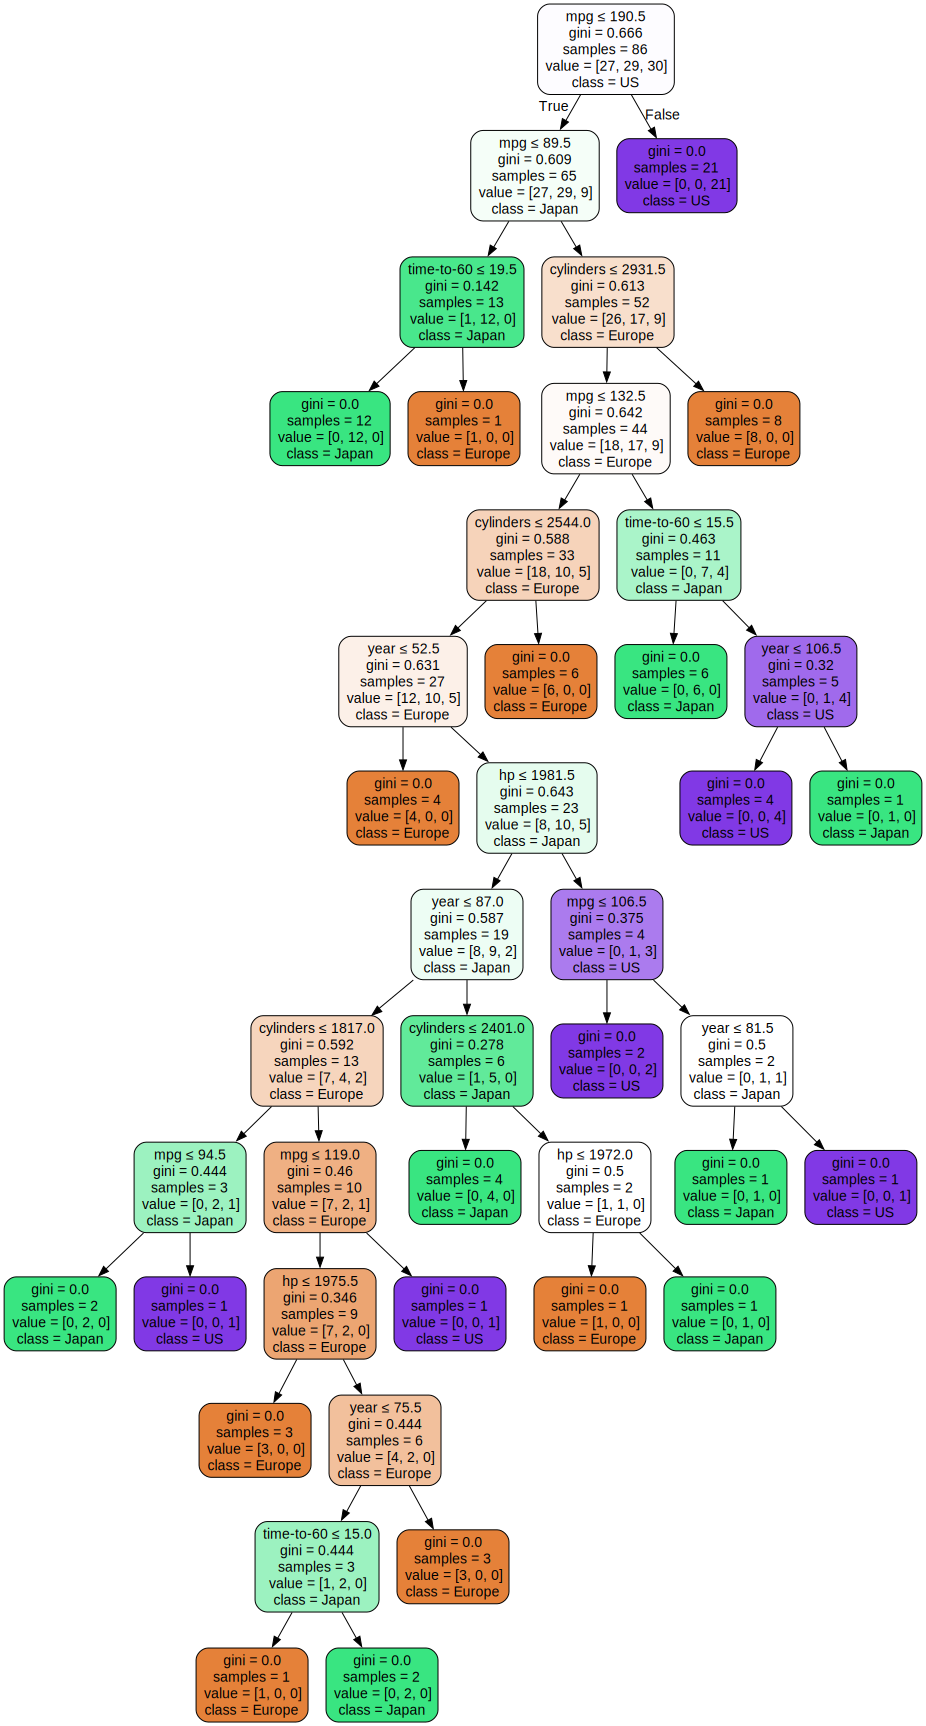

In [31]:
# Vizualise tree complete
vizu_tree(model)

## Calculating model accuracy

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [33]:
accuracy_score(y_test, y_pred)

0.7567567567567568

In [34]:
def create_model(x_train, y_train, x_test, y_test, tree_size):
    tree_algorithm = tree.DecisionTreeClassifier(max_depth=tree_size, random_state=42)
    model = tree_algorithm.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return model, accuracy

In [35]:
for size in range(1, 21):
    model, accuracy = create_model(x_train, y_train, x_test, y_test, size)
    print("Accuracy:" + str(size), accuracy)

Accuracy:1 0.6486486486486487
Accuracy:2 0.6756756756756757
Accuracy:3 0.6756756756756757
Accuracy:4 0.6756756756756757
Accuracy:5 0.7027027027027027
Accuracy:6 0.6756756756756757
Accuracy:7 0.6486486486486487
Accuracy:8 0.7297297297297297
Accuracy:9 0.7567567567567568
Accuracy:10 0.7567567567567568
Accuracy:11 0.7297297297297297
Accuracy:12 0.7297297297297297
Accuracy:13 0.7297297297297297
Accuracy:14 0.7297297297297297
Accuracy:15 0.7297297297297297
Accuracy:16 0.7297297297297297
Accuracy:17 0.7297297297297297
Accuracy:18 0.7297297297297297
Accuracy:19 0.7297297297297297
Accuracy:20 0.7297297297297297


#### Result
The best **Accuracy** can be found in the model when the *max_depth* is equal to **9**